<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Show-the-format-of-the-result" data-toc-modified-id="Show-the-format-of-the-result-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Show the format of the result</a></span></li><li><span><a href="#Learning-curve-with-different-number-of-cores-(learning_cores-2^8)" data-toc-modified-id="Learning-curve-with-different-number-of-cores-(learning_cores-2^8)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Learning curve with different number of cores (learning_cores 2^8)</a></span></li><li><span><a href="#Comparison-of-computational-time-(learning_cores-2^8)" data-toc-modified-id="Comparison-of-computational-time-(learning_cores-2^8)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison of computational time (learning_cores 2^8)</a></span></li><li><span><a href="#Learning-curve-(one_core,-different-quantization-level)" data-toc-modified-id="Learning-curve-(one_core,-different-quantization-level)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Learning curve (one_core, different quantization level)</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Show the format of the result

In [5]:
with open('s_2ex1/qsgd50-cores1-1/iters.pickle', 'rb') as f:
    d1 = pickle.load(f)
d1

array([      0,   67739,  135478,  203217,  270956,  338695,  406434,
        474173,  541912,  609651,  677390,  745129,  812868,  880607,
        948346, 1016085, 1083824, 1151563, 1219302, 1287041])

In [6]:
with open('s_2ex1/qsgd50-cores2-0/losses.pickle', 'rb') as f:
    d2 = pickle.load(f)
d2

array([0.6983729 , 0.37110396, 0.26600038, 0.20740443, 0.17402194,
       0.15128098, 0.1348943 , 0.12864304, 0.11972209, 0.11549432,
       0.10992692, 0.10824067, 0.10532289, 0.10246197, 0.10139239,
       0.09970588, 0.09882935, 0.09746709, 0.09658821, 0.0957637 ])

In [7]:
with open('s_2ex1/qsgd50-cores4-0/timers.pickle', 'rb') as f:
    d3 = pickle.load(f)
d3

array([1.07069016e-02, 3.63683836e+01, 7.36269255e+01, 1.11385577e+02,
       1.48744251e+02, 1.86302769e+02, 2.24161924e+02, 2.61318823e+02,
       2.98777236e+02, 3.36035647e+02, 3.73393493e+02, 4.10952258e+02,
       4.48012711e+02, 4.85071568e+02, 5.22330077e+02, 5.59591997e+02,
       5.96849689e+02, 6.33908769e+02, 6.71067559e+02, 7.08425846e+02])

# Learning curve with different number of cores (learning_cores 2^8)

In [12]:
with open('s_2ex8/qsgd50-cores1-1/losses.pickle', 'rb') as f:
    loss_one_core = pickle.load(f)
with open('s_2ex8/qsgd50-cores2-0/losses.pickle', 'rb') as f:
    loss_two_cores = pickle.load(f)
with open('s_2ex8/qsgd50-cores4-0/losses.pickle', 'rb') as f:
    loss_four_cores = pickle.load(f)
with open('s_2ex8/qsgd50-cores1-1/iters.pickle', 'rb') as f:
    loss_iters = pickle.load(f)

In [13]:
learning_cores = pd.DataFrame(columns=["one_core", "two_cores", "four_cores"])

In [14]:
learning_cores["one_core"] = loss_one_core
learning_cores["two_cores"] = loss_two_cores
learning_cores["four_cores"] = loss_four_cores
learning_cores.index = loss_iters

<AxesSubplot:>

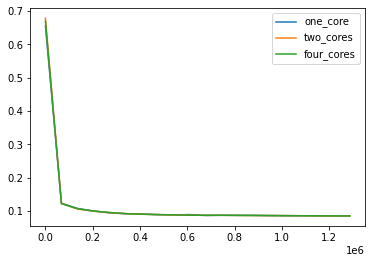

In [15]:
learning_cores.plot()

# Comparison of computational time (learning_cores 2^8)

In [16]:
with open('s_2ex8/qsgd50-cores1-1/timers.pickle', 'rb') as f:
    timers_one_core = pickle.load(f)
with open('s_2ex8/qsgd50-cores2-0/timers.pickle', 'rb') as f:
    timers_two_cores = pickle.load(f)
with open('s_2ex8/qsgd50-cores4-0/timers.pickle', 'rb') as f:
    timers_four_cores = pickle.load(f)

In [17]:
time_cores = pd.DataFrame(columns=["one_core", "two_cores", "four_cores"])

In [18]:
time_cores["one_core"] = timers_one_core
time_cores["two_cores"] = timers_two_cores
time_cores["four_cores"] = timers_four_cores
time_cores.index = loss_iters
time_cores.iloc[-1,:]

one_core      1273.462978
two_cores      804.506913
four_cores     701.540608
Name: 1287041, dtype: float64

# Learning curve (one_core, different quantization level)

In [21]:
loss_2_power_8 = loss_one_core
with open('s_2ex6/qsgd50-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_6 = pickle.load(f)
with open('s_2ex4/qsgd50-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_4 = pickle.load(f)
with open('s_2ex1/qsgd50-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_1 = pickle.load(f)

In [22]:
loss_quantization_level = pd.DataFrame(columns=["2^8", "2^6", "2^4", "2^1"])

In [26]:
loss_quantization_level["2^8"] = loss_2_power_8
loss_quantization_level["2^6"] = loss_2_power_6
loss_quantization_level["2^4"] = loss_2_power_4 # Remove the last item because the length is inconsistent.
loss_quantization_level["2^1"] = loss_2_power_1
loss_quantization_level.index = loss_iters

<AxesSubplot:>

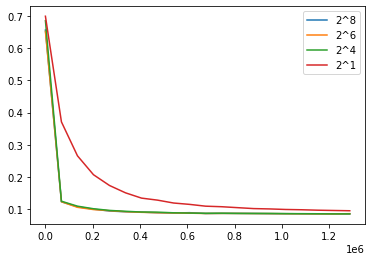

In [27]:
loss_quantization_level.plot()